# <font color=#0066ff> Statements Integration
## This sample operates on a MT940 Bank Statement integration example


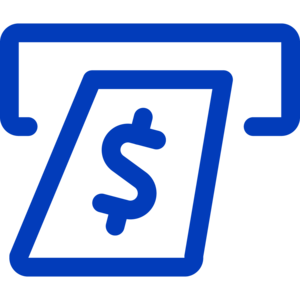

## <font color='yellow'>Code for token generation and API management </font>

In [ ]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO" #@param ['DEMO'] {allow-input: true}

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm sample_requests -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib
try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests


In [ ]:
#@title Import custom modules
import time
import json
import matplotlib
from pprint import pprint
import matplotlib.pyplot as plot
from datetime import datetime, timedelta
import random
import numpy as np
import matplotlib
from pprint import pprint
import matplotlib.pyplot as plot
import json
import random
import matplotlib.pyplot as plt
!pip install striprtf
from striprtf.striprtf import rtf_to_text
import functools
from google.colab import widgets
import ipywidgets
from IPython.display import display
from google.colab import files

## <font color='yellow'>Connect and  retrieve token</font>


In [ ]:
#@title <font color='lime'> Connect </font>

token = sample_requests.login()
print ('Token: '+ token)

## <font color='yellow'>Integrate MT940 bank statement</font>

In [ ]:
#@title <font color='lime'>  Integrate MT940 </font>
#@markdown The example payload is already included inside of the code and will be uploaded before being integrated into the statement.

#@markdown Payload can be seen in the response below, after running the cell.

usePayload = True #@param {type:"boolean"}
traces = True #@param {type:"boolean"}

if traces:
  if usePayload:
    print('data will be sent by payload\n')
  else:
    print('data will be sent by file\n')

MT940 = ''':20:196071
:25:PAYMENTTITLE01
:28C:1
:60M:211005
:61:2110051005CR66300.00+CPONONREF
:86:Description1
:62F:C211005EUR84300.00     
'''

print (MT940)
res = sample_requests.import_data(token, MT940, 'VDO_APITESTING.txt', 'IMP_BK_MT940', usePayload, traces)

print("")
print("")
print("Status of the report:")

integrated = False
while not integrated:
  res = sample_requests.run_report(token,"VDO_APITESTING")

  buffer = sample_requests.StringIO(res[3:])
  df2 = sample_requests.pd.read_csv (buffer)
  i = iter(range(1, len(df2.columns) + 1))

  df2.columns = [x if not x.startswith('Unnamed') else next(i) for x in df2.columns]
  print (df2)
  if ( df2.at[0,'Statement delivery'] == 'Integrated'):
    integrated = True
  elif ( df2.at[0, 'Statement delivery'] != None ):
    print (df2.at[0,'Statement delivery'])
    break